In [4]:
#!pip install openpyxl
#!pip install xlrd

## Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta, date

## Load Charging Sessions

In [3]:
sc = pd.read_excel('Electric_Vehicle_Charging_Station_Data_-7083510079555258691.xlsx')

### 0. Data Types and Time Zone adjustment

In [4]:
#Imprmir el tipo de dato de cada columna
print(sc.dtypes)

Station_Name                   object
Address                        object
City                           object
State_Province                 object
Zip_Postal_Code                 int64
Start_Date___Time              object
Start_Time_Zone                object
End_Date___Time                object
End_Time_Zone                  object
Total_Duration__hh_mm_ss_      object
Charging_Time__hh_mm_ss_       object
Energy__kWh_                  float64
GHG_Savings__kg_              float64
Gasoline_Savings__gallons_    float64
Port_Type                      object
ObjectID                        int64
ObjectId2                       int64
dtype: object


In [5]:
# Paso 1. Convertir las columnas de fecha a tipo datetime
#genera error por la diferencia de formatos en la misma columna
print(pd.to_datetime(sc['Start_Date___Time']))

ValueError: time data "2023-06-02 05:23:17" doesn't match format "%m/%d/%Y %H:%M", at position 62262. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
display(sc[62262:])

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,ObjectId2
62262,BOULDER / BASELINE ST1,600 Baseline Rd,Boulder,Colorado,80302,2023-06-02 05:23:17,MDT,2023-06-02 06:45:27,MDT,01:22:13,01:21:54,4.789,3.400,0.601,Level 2,62378,62263
62263,MUNICIPAL SC / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/6/2023 16:53,MDT,5/6/2023 18:41,MDT,1:48:05,1:21:01,4.070,2.890,0.511,Level 2,62076,62264
62264,BOULDER / OSMP FLEET 1,2520 55th St,Boulder,Colorado,80301,6/1/2023 13:28,MDT,6/2/2023 7:46,MDT,18:18:10,2:42:51,6.676,4.740,0.838,Level 2,62328,62265
62265,MUNICIPAL SC / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/5/2023 9:07,MDT,5/5/2023 16:05,MDT,6:58:10,6:56:03,42.422,30.120,5.324,Level 2,62026,62266
62266,BOULDER / ALPINE ST1,2667 Broadway,Boulder,Colorado,80304,5/9/2023 17:44,MDT,5/9/2023 20:00,MDT,2:15:44,2:04:40,6.142,4.361,0.771,Level 2,62282,62267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937,148132
148132,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938,148133
148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939,148134
148134,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940,148135


In [7]:
def date_format(date):
    try:
        fecha2 = datetime.strptime(date, "%m/%d/%Y %H:%M")
        return fecha2
    except:
        fecha2 = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        return fecha2

sc['Start_Date___Time'] = sc['Start_Date___Time'].apply(date_format)
print(sc.dtypes)
print(sc['Start_Date___Time'])

Station_Name                          object
Address                               object
City                                  object
State_Province                        object
Zip_Postal_Code                        int64
Start_Date___Time             datetime64[ns]
Start_Time_Zone                       object
End_Date___Time                       object
End_Time_Zone                         object
Total_Duration__hh_mm_ss_             object
Charging_Time__hh_mm_ss_              object
Energy__kWh_                         float64
GHG_Savings__kg_                     float64
Gasoline_Savings__gallons_           float64
Port_Type                             object
ObjectID                               int64
ObjectId2                              int64
dtype: object
0        2018-01-01 17:49:00
1        2018-01-02 08:52:00
2        2018-01-02 21:11:00
3        2018-01-03 09:19:00
4        2018-01-03 14:13:00
                 ...        
148131   2023-11-30 19:58:00
148132   2023-11-3

In [8]:
# Paso 2: Localizar las fechas y horas en la zona horaria
sc['Start_Date___Time'] = sc['Start_Date___Time'].dt.tz_localize(tz='America/Denver', ambiguous=np.array(sc['Start_Time_Zone']== 'MDT'))

In [9]:
#Paso 3: Convertir a UTC
sc['Start_Date___Time_utc'] = sc['Start_Date___Time'].dt.tz_convert('UTC')

### 1. Gráficos de Dispesión (Scatter Plots)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

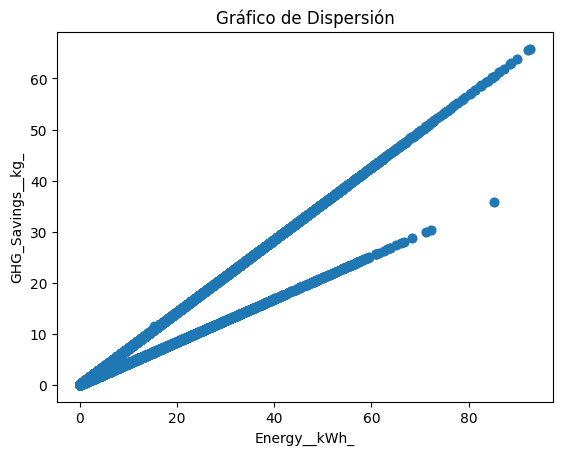

In [13]:
# Gráfico de dispersión utilizando matplotlib (https://matplotlib.org/)
plt.scatter(sc['Energy__kWh_'], sc['GHG_Savings__kg_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Energy__kWh_')
plt.ylabel('GHG_Savings__kg_')
plt.show()

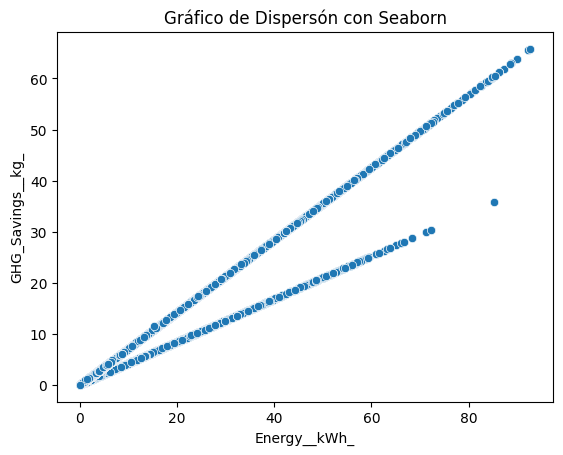

In [14]:
# Gráfico de dispersión utilizando seaborn (https://seaborn.pydata.org/)
sns.scatterplot(data=sc,x='Energy__kWh_' ,y='GHG_Savings__kg_' )
plt.title('Gráfico de Dispersón con Seaborn')
plt.show()

### 2. Histogramas

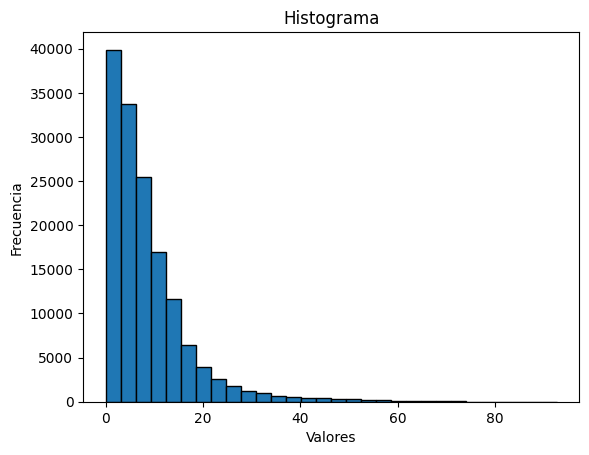

In [15]:
# Histograma utilizando matplotlib
plt.hist(sc['Energy__kWh_'], bins=30, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()


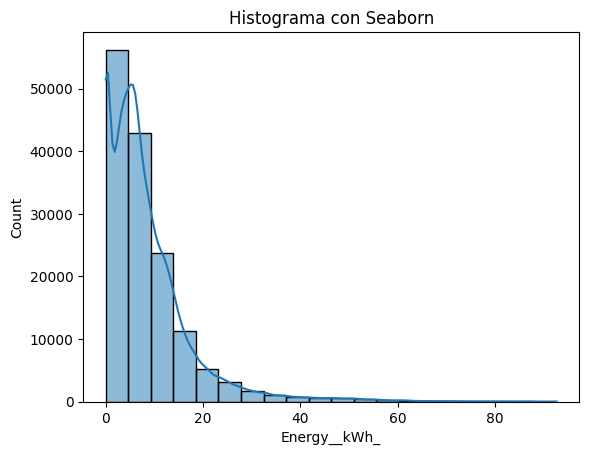

In [16]:
# Histograma utilizando seaborn
sns.histplot(data=sc, x='Energy__kWh_', bins=20, kde=True)
plt.title('Histograma con Seaborn')
plt.show()

In [17]:
# Split the time string into hours, minutes, and seconds (9:35:17)
sc['hours'] = pd.to_numeric(sc['Total_Duration__hh_mm_ss_'].str.split(':', expand = True)[0])
sc['minutes'] = pd.to_numeric(sc['Total_Duration__hh_mm_ss_'].str.split(':', expand = True)[1])
sc['seconds'] = pd.to_numeric(sc['Total_Duration__hh_mm_ss_'].str.split(':', expand = True)[2])
# Convert all units to seconds
sc['total_seconds'] = sc['hours'] * 3600 + sc['minutes'] * 60 + sc['seconds']
sc['total_minutes'] = sc['total_seconds'] / 60
sc['total_hours'] = sc['total_minutes'] / 60

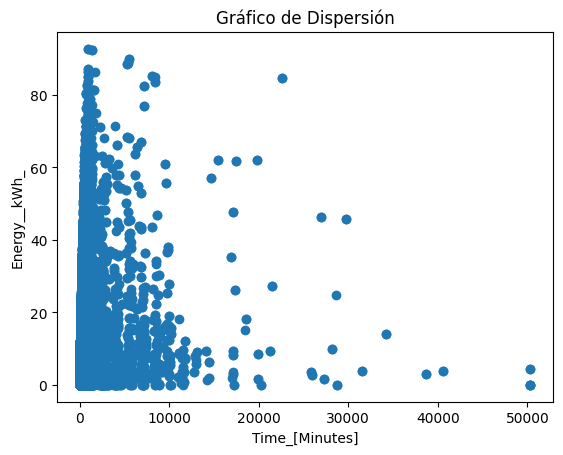

In [18]:
# Gráfico de dispersión utilizando matplotlib (https://matplotlib.org/)
plt.scatter(sc['total_minutes'], sc['Energy__kWh_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Time_[Minutes]')
plt.ylabel('Energy__kWh_')
plt.show()

In [19]:
print(10000/60)

166.66666666666666


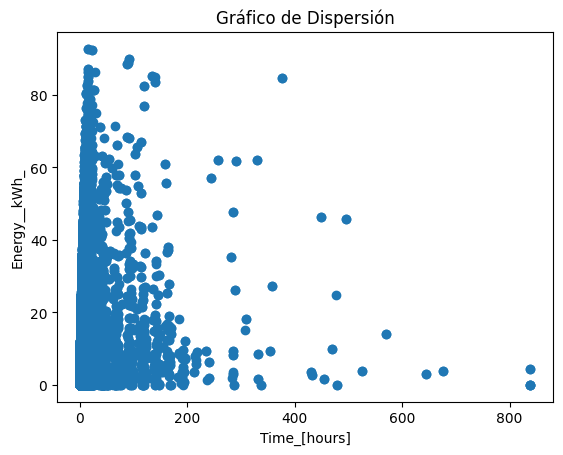

In [20]:
# Gráfico de dispersión utilizando matplotlib (https://matplotlib.org/)
plt.scatter(sc['total_hours'], sc['Energy__kWh_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Time_[hours]')
plt.ylabel('Energy__kWh_')
plt.show()

In [21]:
print(200/24)

8.333333333333334


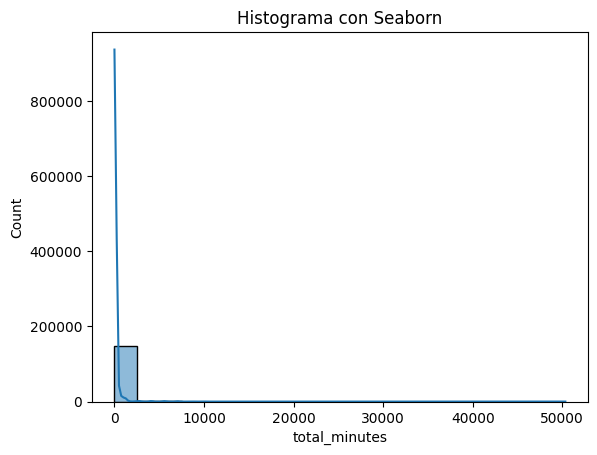

In [22]:
# Histograma utilizando seaborn
sns.histplot(data=sc, x='total_minutes', bins=20, kde=True)
plt.title('Histograma con Seaborn')
plt.show()

#### Histogram of the that take less than 200 hours

In [23]:
# df.loc hace que 
Data_time = sc.loc[sc['total_minutes'] < 500, 'total_hours']

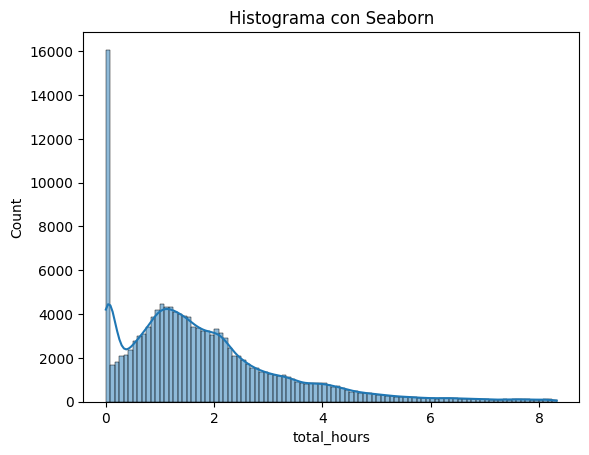

In [24]:
# Histograma utilizando seaborn
sns.histplot(data=Data_time, bins=100, kde=True)
plt.title('Histograma con Seaborn')
plt.show()

In [25]:
print(sc.dtypes)

Station_Name                                          object
Address                                               object
City                                                  object
State_Province                                        object
Zip_Postal_Code                                        int64
Start_Date___Time             datetime64[ns, America/Denver]
Start_Time_Zone                                       object
End_Date___Time                                       object
End_Time_Zone                                         object
Total_Duration__hh_mm_ss_                             object
Charging_Time__hh_mm_ss_                              object
Energy__kWh_                                         float64
GHG_Savings__kg_                                     float64
Gasoline_Savings__gallons_                           float64
Port_Type                                             object
ObjectID                                               int64
ObjectId2               

### 3. Gráficos de Barras (Bar Plots)

#### - Cuál es la parte de la ciudad con mayor número de sesiones de carga?

In [26]:
zip_code_counts = sc['Zip_Postal_Code'].value_counts()
station_counts = sc['Station_Name'].value_counts()

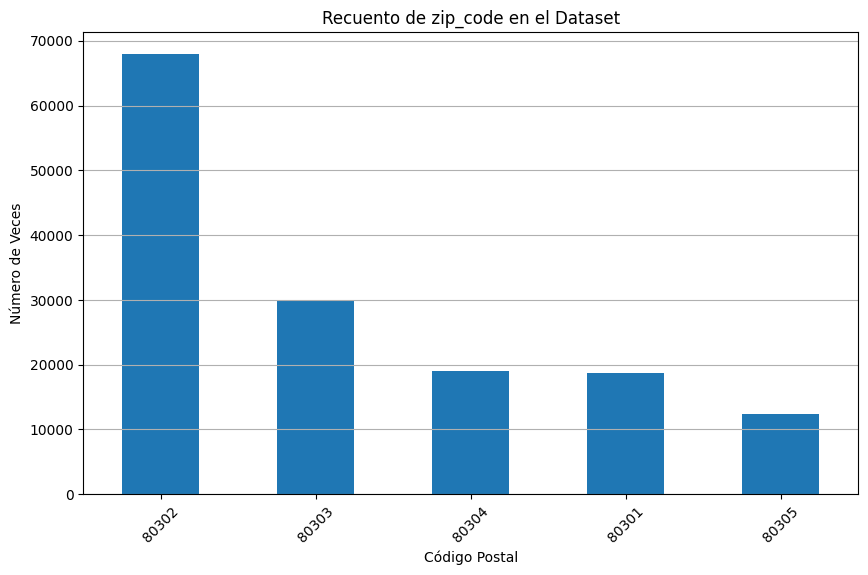

In [27]:
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
zip_code_counts.plot(kind='bar')
plt.title('Recuento de zip_code en el Dataset')
plt.xlabel('Código Postal')
plt.ylabel('Número de Veces')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Mostrar líneas de la cuadrícula en el eje y
plt.show()

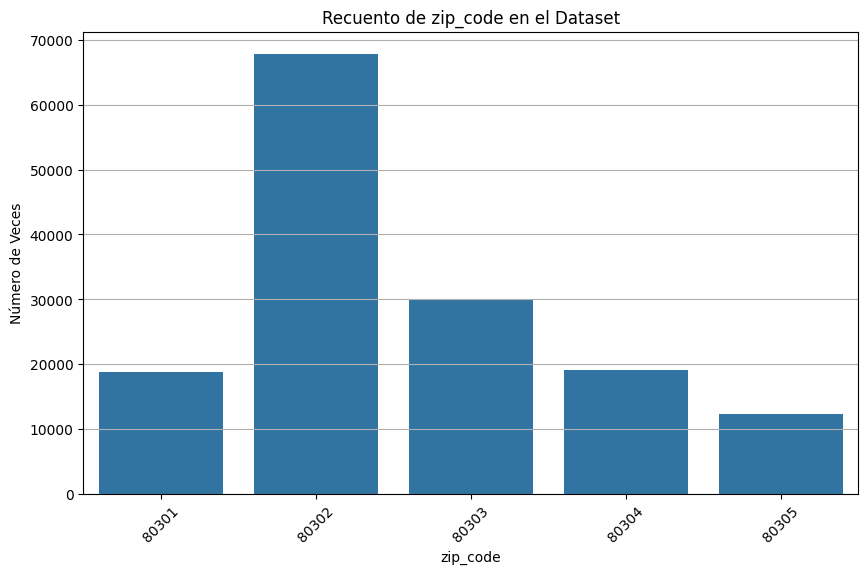

In [28]:
zip_code_counts_df = zip_code_counts.reset_index()
zip_code_counts_df.columns = ['zip_code', 'Count']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='zip_code', y='Count', data=zip_code_counts_df)
plt.title('Recuento de zip_code en el Dataset')
plt.xlabel('zip_code')
plt.ylabel('Número de Veces')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines on the y-axis
plt.show()

#### - Cuál es la estación con mayor utilización?

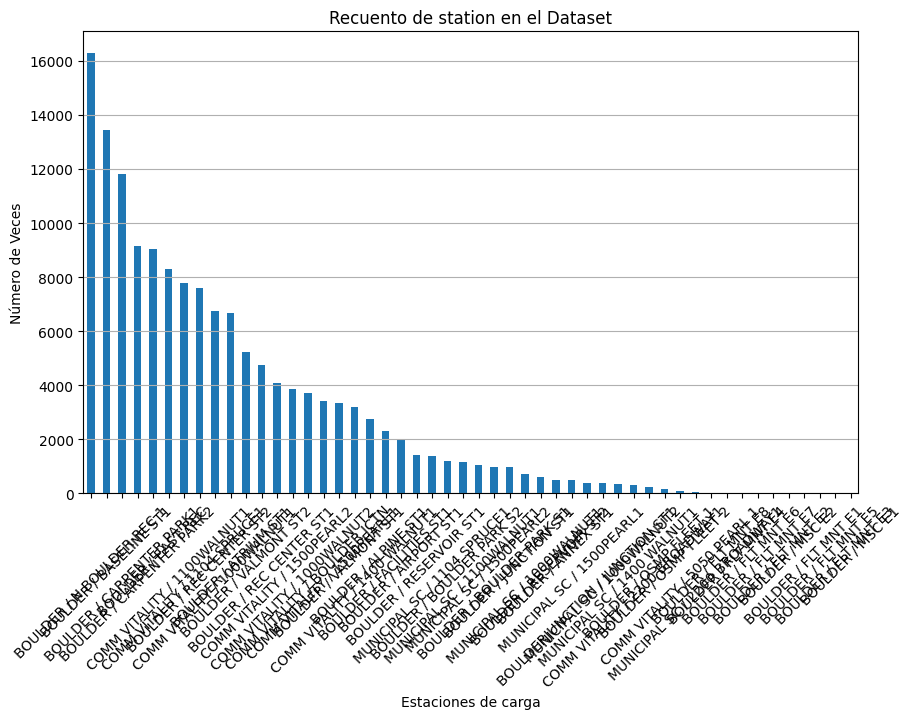

In [29]:
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
station_counts.plot(kind='bar')
plt.title('Recuento de station en el Dataset')
plt.xlabel('Estaciones de carga')
plt.ylabel('Número de Veces')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Mostrar líneas de la cuadrícula en el eje y
plt.show()

In [30]:
# print(station_counts)
station_counts_df = station_counts.reset_index()
# print(station_counts_df)
station_counts_df.columns = ['Station_Name', 'Count']

Stations_plot = station_counts_df.loc[station_counts_df['Count'] > 8000]

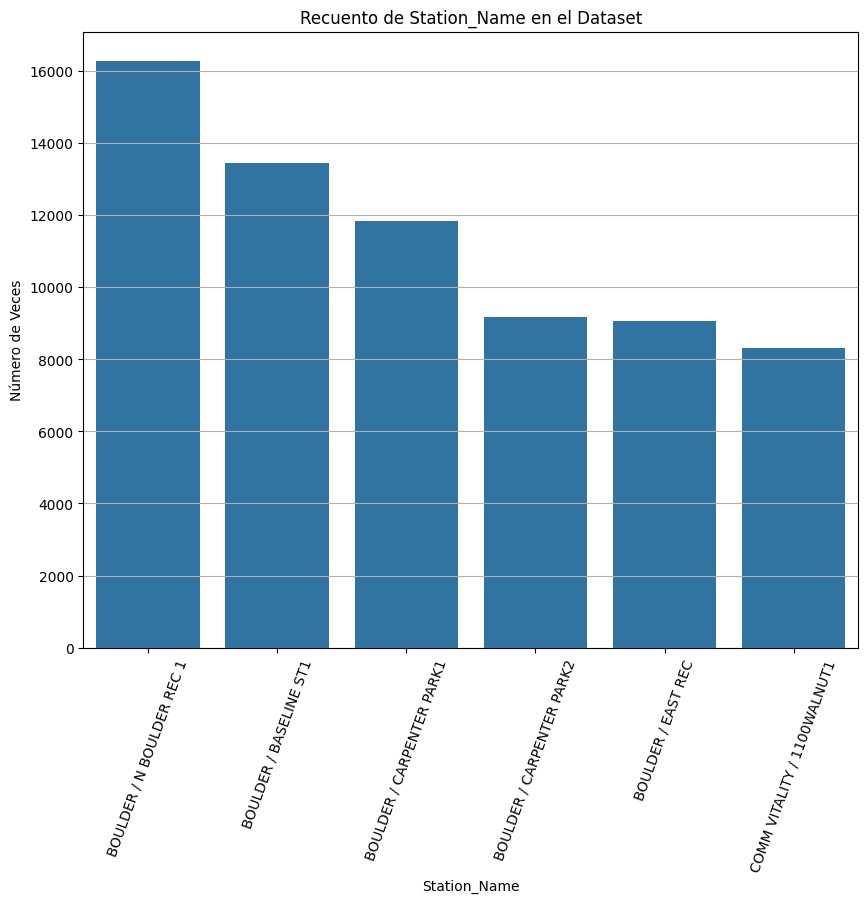

In [31]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.barplot(x='Station_Name', y='Count', data=Stations_plot)
plt.title('Recuento de Station_Name en el Dataset')
plt.xlabel('Station_Name')
plt.ylabel('Número de Veces')
plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines on the y-axis
plt.show()

### 4. Diagramas de Caja (Box Plots)

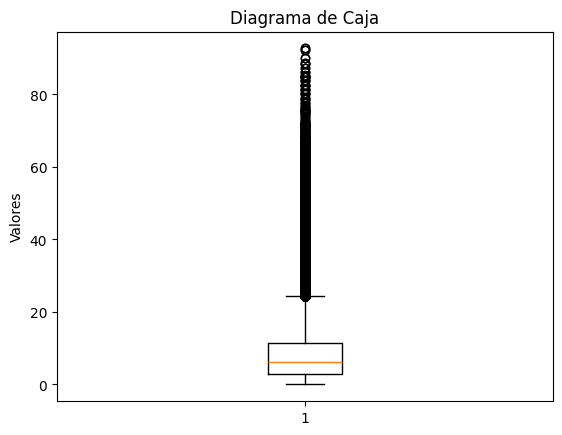

In [32]:
# Diagrama de caja utilizando matplotlib
plt.boxplot(sc['Energy__kWh_'])
plt.title('Diagrama de Caja')
plt.ylabel('Valores')
plt.show()

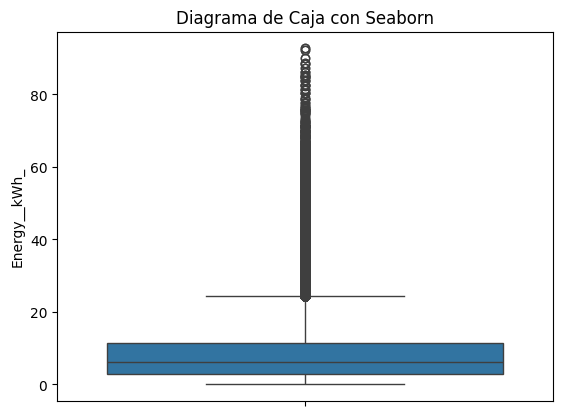

In [33]:
# Diagrama de caja utilizando seaborn
sns.boxplot(data=sc, y='Energy__kWh_')
plt.title('Diagrama de Caja con Seaborn')
plt.show()

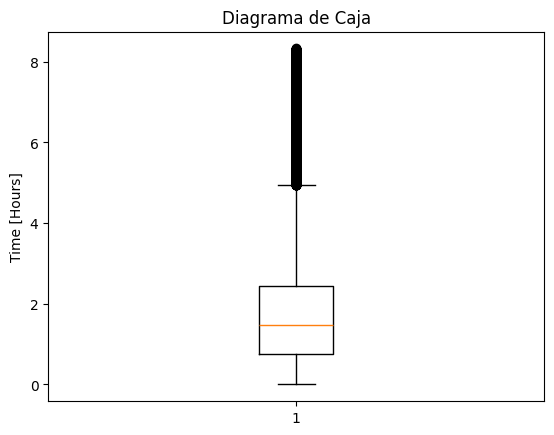

In [34]:
# Diagrama de caja utilizando matplotlib
plt.boxplot(Data_time)
plt.title('Diagrama de Caja')
plt.ylabel('Time [Hours]')
plt.show()

### 5. Mapas de Calor (Heatmaps)

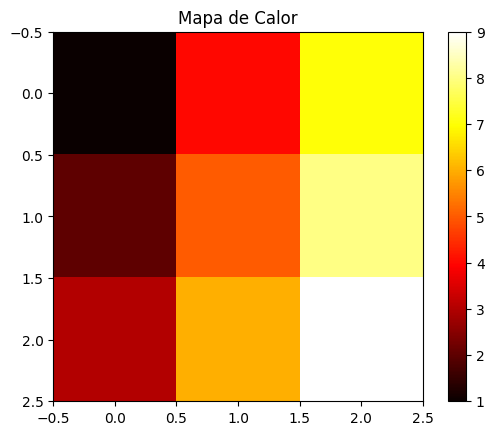

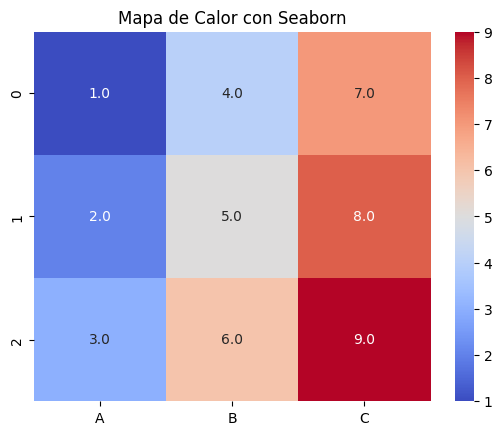

In [35]:
# Crear un DataFrame de ejemplo
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Mapa de calor utilizando matplotlib
plt.imshow(df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de Calor')
plt.show()

# Mapa de calor utilizando seaborn
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mapa de Calor con Seaborn')
plt.show()

## Obtener el perfil de Carga

In [36]:
# grouping again for calculation of the sum of ChargreID-Energy for all day and hours
total_energy_per_hour = sc.groupby(['Start_Date___Time_utc'])['Energy__kWh_'].sum().reset_index().sort_values(by='Start_Date___Time_utc', ascending=True)

In [37]:
print(total_energy_per_hour)

          Start_Date___Time_utc  Energy__kWh_
0     2018-01-02 00:49:00+00:00        13.008
1     2018-01-02 15:52:00+00:00         4.962
2     2018-01-03 04:11:00+00:00        30.092
3     2018-01-03 16:19:00+00:00        13.894
4     2018-01-03 21:13:00+00:00         3.600
...                         ...           ...
82844 2023-12-01 02:58:00+00:00         1.194
82845 2023-12-01 03:00:00+00:00         0.000
82846 2023-12-01 03:01:00+00:00         1.899
82847 2023-12-01 04:03:00+00:00         1.499
82848 2023-12-01 06:27:00+00:00        17.755

[82849 rows x 2 columns]


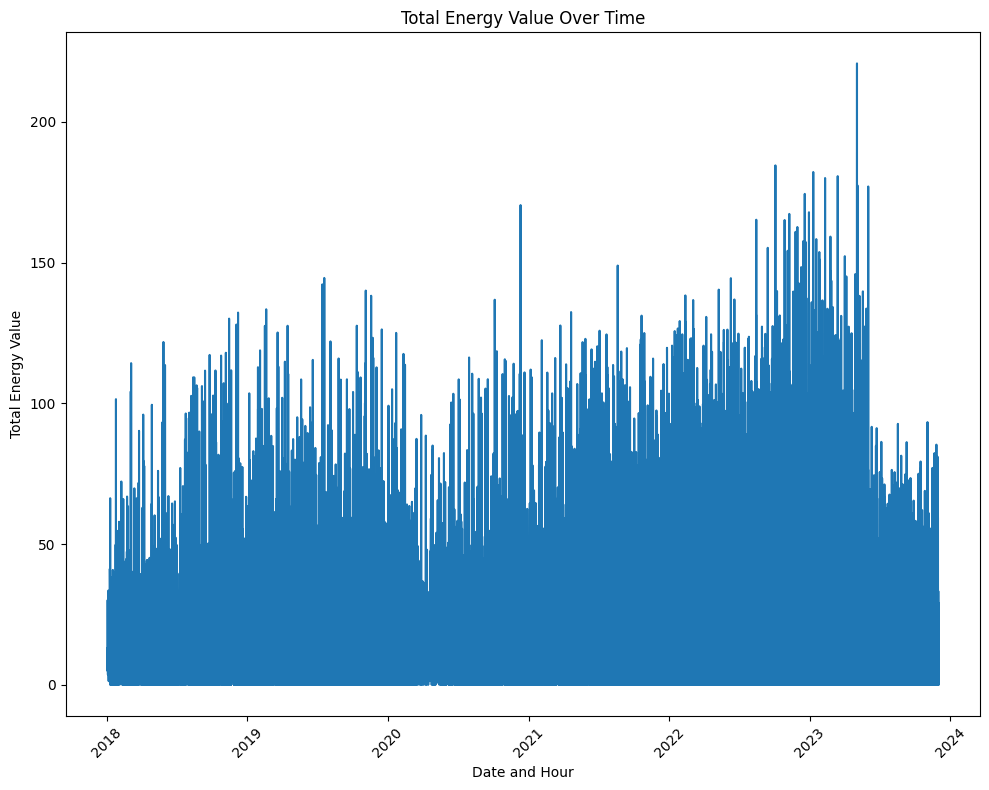

In [38]:
import matplotlib.pyplot as plt

x = pd.to_datetime(total_energy_per_hour['Start_Date___Time_utc'])
y = total_energy_per_hour['Energy__kWh_']

# Plot
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

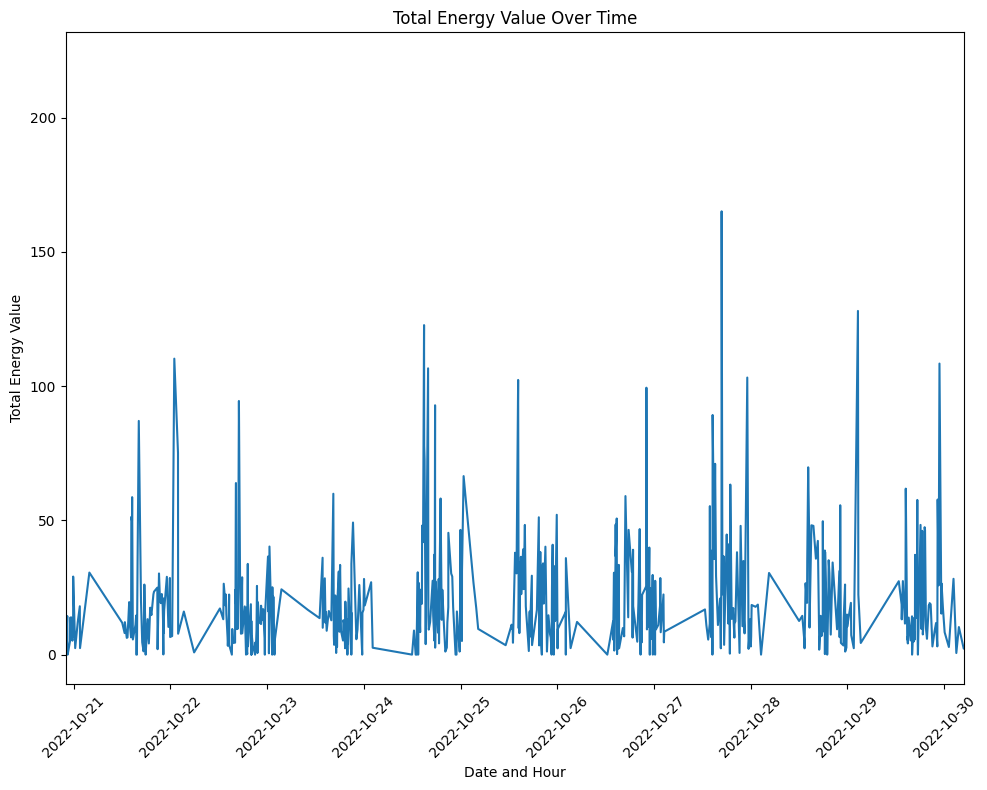

In [39]:
# Plot
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
# Define manualmente los límites del eje X del gráfico
plt.xlim( [pd.to_datetime('2022-10-20 22:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2022-10-30 05:00:00', format = '%Y-%m-%d %H:%M:%S')])########### This is a filter on time #####
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
Energy_dataset = sc[['Start_Date___Time_utc', 'Energy__kWh_']]

In [41]:
Energy_dataset.set_index('Start_Date___Time_utc', inplace=True)
# agrupar por hora y sumar los valores de energía
Energy_dataset_profile = Energy_dataset.resample('H').agg({'Energy__kWh_': 'sum'})

/var/folders/6v/h6bnqwh15_11vjqftnf1pxqw0000gn/T/ipykernel_22435/3249623977.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Energy_dataset_profile = Energy_dataset.resample('H').agg({'Energy__kWh_': 'sum'})


In [42]:
Energy_dataset_profile

,Energy__kWh_
Start_Date___Time_utc,
2018-01-02 00:00:00+00:00,13.008
2018-01-02 01:00:00+00:00,0.000
2018-01-02 02:00:00+00:00,0.000
2018-01-02 03:00:00+00:00,0.000
2018-01-02 04:00:00+00:00,0.000
...,...
2023-12-01 02:00:00+00:00,6.951
2023-12-01 03:00:00+00:00,1.899
2023-12-01 04:00:00+00:00,1.499


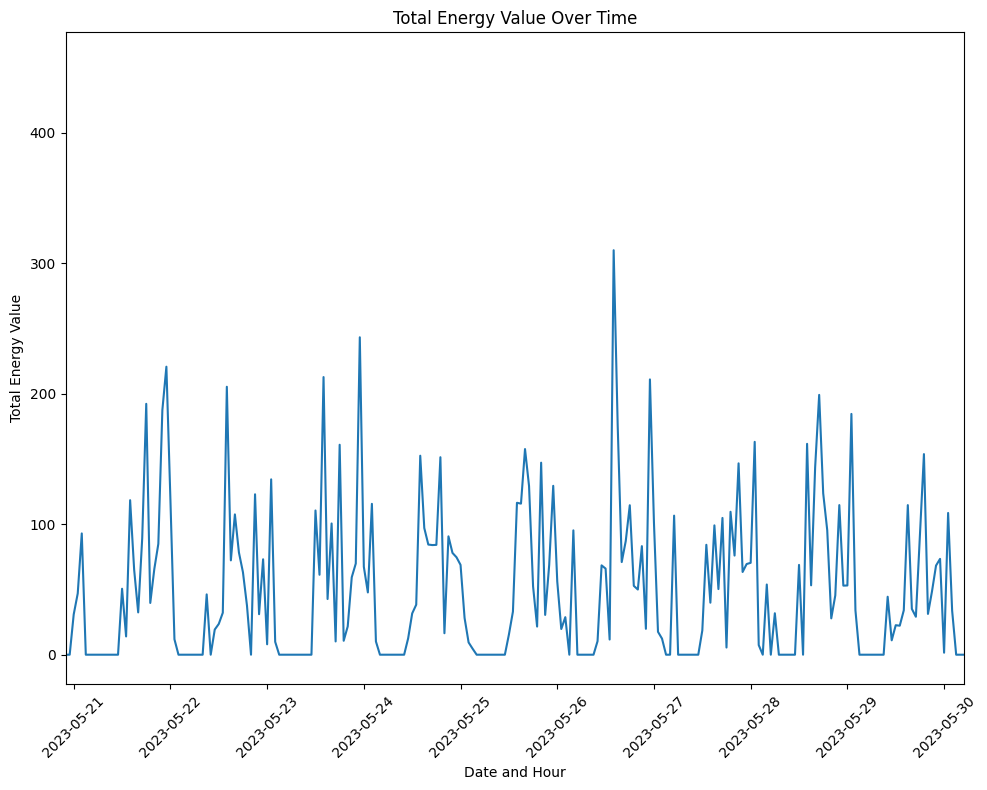

In [43]:
# Plot
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
# Define manualmente los límites del eje X del gráfico
plt.xlim( [pd.to_datetime('2023-05-20 22:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-30 05:00:00', format = '%Y-%m-%d %H:%M:%S')])########### This is a filter on time #####
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

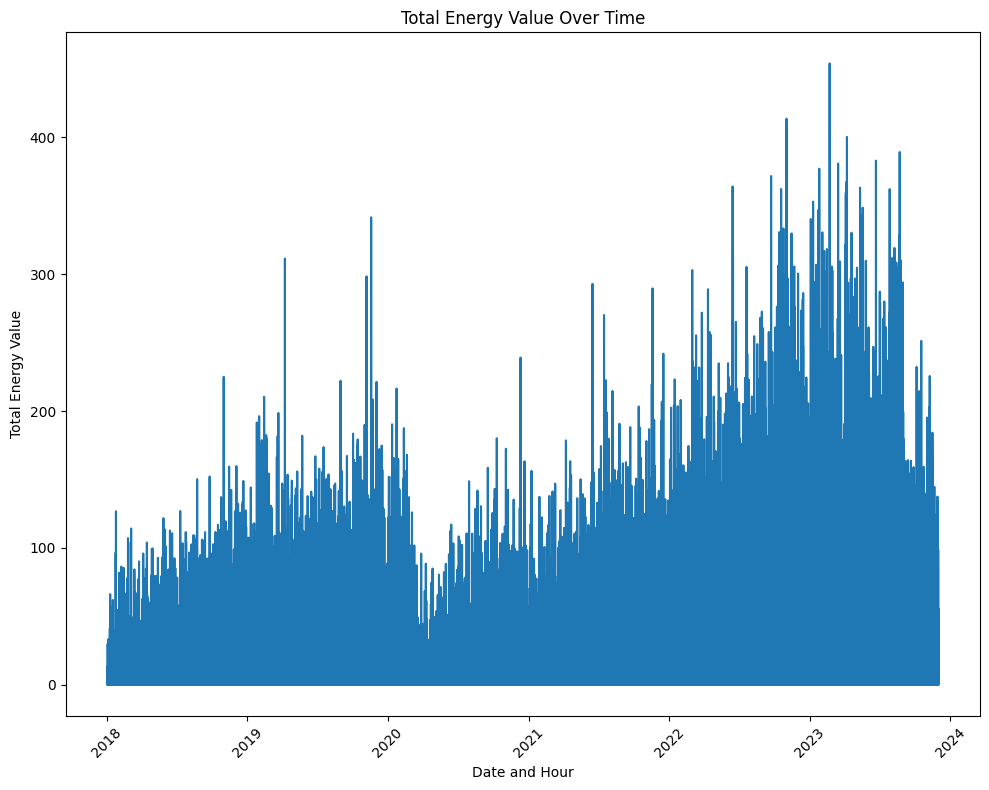

In [44]:
# Plot
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# agrupar por día y sumar los valores de energía
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

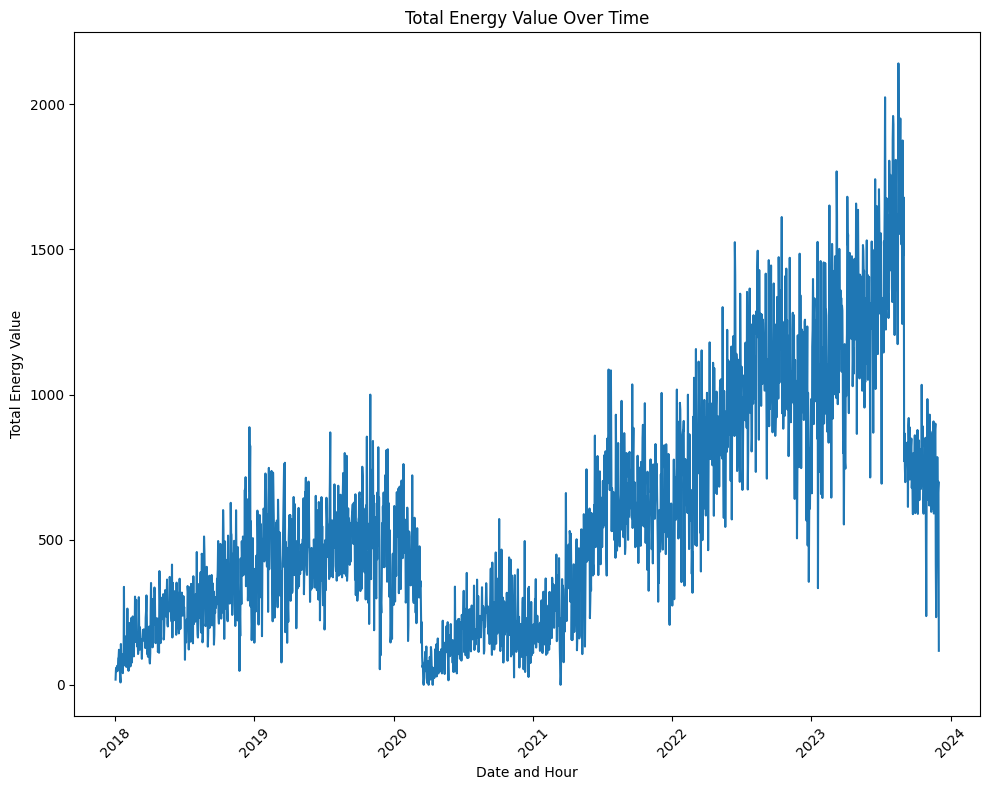

In [46]:
# Plot
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile_day)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

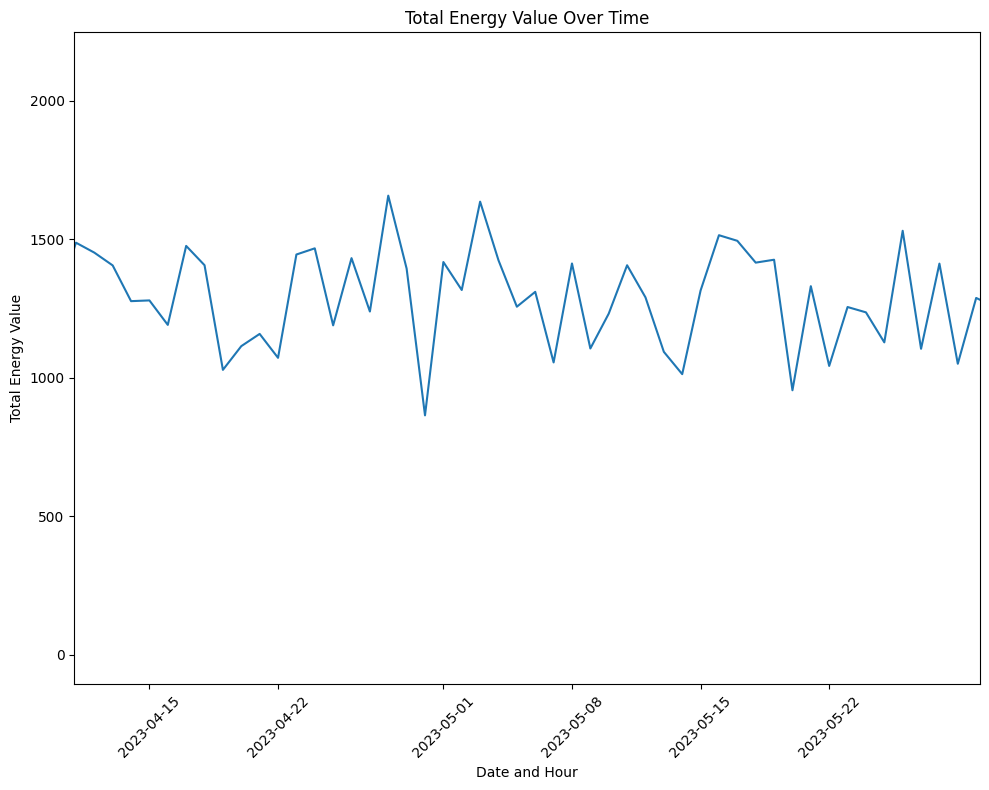

In [47]:
# Plot
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile_day)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
# Define manualmente los límites del eje X del gráfico
plt.xlim( [pd.to_datetime('2023-04-10 22:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-30 05:00:00', format = '%Y-%m-%d %H:%M:%S')])########### This is a filter on time #####
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
print(Energy_dataset_profile_day)

                           Energy__kWh_
Start_Date___Time_utc                  
2018-01-02 00:00:00+00:00        17.970
2018-01-03 00:00:00+00:00        52.546
2018-01-04 00:00:00+00:00        59.056
2018-01-05 00:00:00+00:00        46.352
2018-01-06 00:00:00+00:00        65.440
...                                 ...
2023-11-27 00:00:00+00:00       784.302
2023-11-28 00:00:00+00:00       629.529
2023-11-29 00:00:00+00:00       674.124
2023-11-30 00:00:00+00:00       699.472
2023-12-01 00:00:00+00:00       117.178

[2160 rows x 1 columns]


## Modeling

In [49]:
from sklearn.metrics import mean_squared_error
import datetime
import statsmodels.api as sm

### Random Walk Y_{t-1} (Also called Naive)

In [74]:
# Time series data
df = Energy_dataset_profile_day['Energy__kWh_']

# Split data into train and test data sets
train_size = (int(len(df) * 0.8))
trainData, testData = df[0:train_size], df[(train_size):len(df)]

def naive_random_walk(series, lag):
    predicted_values = []
    for i in range(lag, len(series)):
        predicted_value = series.iloc[i - lag] #+ np.random.normal(0,standard)
        predicted_values.append(predicted_value)
    return pd.Series(predicted_values, index=series.index[lag:])

lag = 1
predictions1 = naive_random_walk(testData, lag)

error = mean_squared_error(testData[lag:], predictions1)
RMSE = error ** 0.5
print('Random Walk MSE: %.3f kWhˆ2' % error)
print('Random Walk RMSE: %.3f kWh' % RMSE)

Random Walk MSE: 80228.428 kWhˆ2
Random Walk RMSE: 283.246 kWh


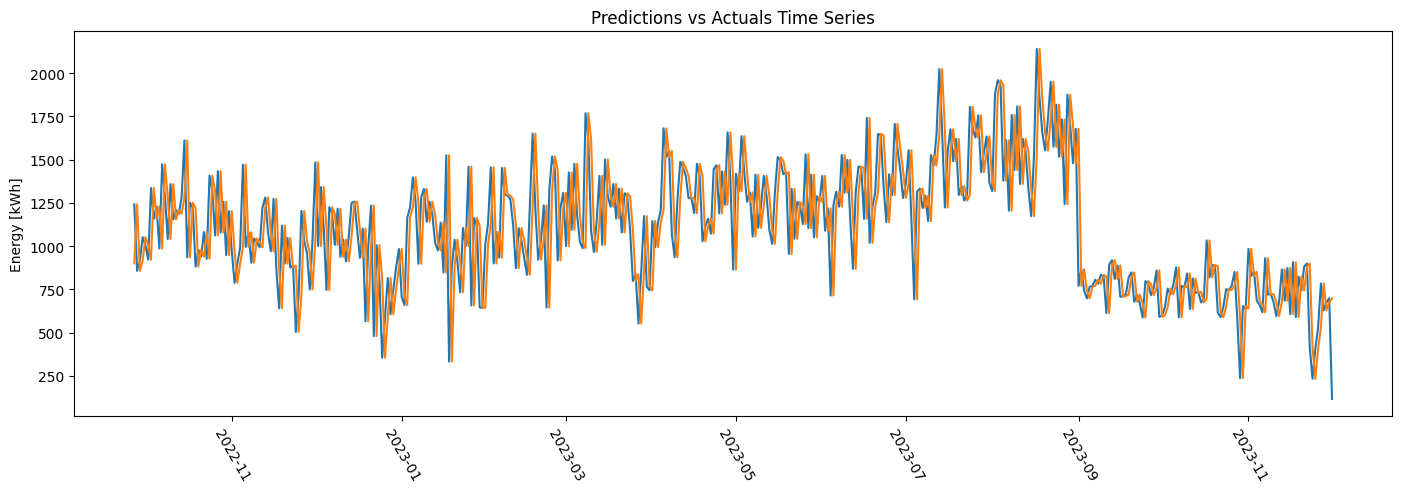

In [51]:
# Plot the original time series
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData[1:])
plt.plot(predictions1)
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

### Seasonal Random Walk $Y_{t-7}$ (seasonal naive - ingenuo estacional)

In [ ]:
# Time series data
df = Energy_dataset_profile_day['Energy__kWh_']

# Split data into train and test data sets
train_size = (int(len(df) * 0.8))
trainData, testData = df[0:train_size], df[(train_size):len(df)]

def naive_random_walk(series, lag):
    predicted_values = []
    for i in range(lag, len(series)):
        predicted_value = series.iloc[i - lag] #+ np.random.normal(0,standard)
        predicted_values.append(predicted_value)
    return pd.Series(predicted_values, index=series.index[lag:])

lag = 7
predictions1 = naive_random_walk(testData, lag)

error = mean_squared_error(testData[lag:], predictions1)
RMSE = error ** 0.5
print('Random Walk MSE: %.3f kWhˆ2' % error)
print('Random Walk RMSE: %.3f kWh' % RMSE)

Random Walk MSE: 98031.461
Random Walk RMSE: 313.100


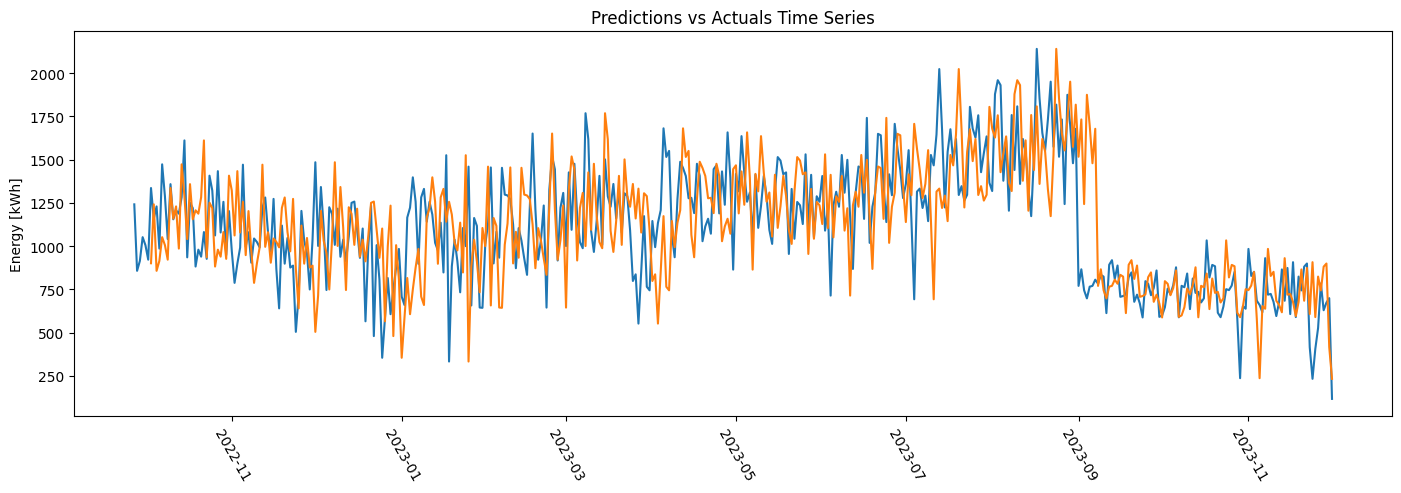

In [53]:
# Plot the original time series
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData[1:])
plt.plot(predictions1)
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

### Naive Model - Mean

In [54]:
# Load time series data
df = Energy_dataset_profile_day['Energy__kWh_']

# Split data into train and testData sets
train_size = int(len(df) * 0.8)
trainData, testData = df[0:train_size], df[(train_size):len(df)]

def naive_model(series, lag):
    predicted_values = []
    for j in range(lag, len(series)):
        predicted_value = 0
        for i in range(1,8):
            predicted_value = predicted_value + series.iloc[j - (lag*i)]
        predicted_value = (predicted_value/8)
        predicted_values.append(predicted_value)
    return pd.Series(predicted_values, index=series.index[lag:])

lag = 7
predictions_naive_model = naive_model(testData, lag)


error = mean_squared_error(testData[lag:], predictions_naive_model)
RMSE = error ** 0.5
print('Persistence MSE: %.3f' % error)
print('Persistence RMSE: %.3f' % RMSE)

Persistence MSE: 113533.854
Persistence RMSE: 336.948


### Explain the cases of training data and Test data

### LInear Model Y_t = b_0 + b_1Y_{t-1} + … + b_7Y_{t-7} + e_t

In [55]:
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

In [56]:
display(Energy_dataset_profile_day.head(5))

,Energy__kWh_
Start_Date___Time_utc,
2018-01-02 00:00:00+00:00,17.970
2018-01-03 00:00:00+00:00,52.546
2018-01-04 00:00:00+00:00,59.056
2018-01-05 00:00:00+00:00,46.352
2018-01-06 00:00:00+00:00,65.440


In [57]:
# Load time series data
df_linear = Energy_dataset_profile_day.copy()

# Create lag variables
lags = 28  # Number of lags
for i in range(1, lags + 1):
    df_linear[f'lag_{i}'] = df_linear['Energy__kWh_'].shift(i)

# Drop rows with missing values due to lag
df_linear = df_linear.dropna()

In [58]:
display(df_linear)

,Energy__kWh_,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28
Start_Date___Time_utc,,,,,,,,,,,,,,,,,,,,,
2018-01-30 00:00:00+00:00,62.112,90.370,104.854,84.506,168.140,85.140,337.344,65.216,105.718,40.148,...,120.760,94.076,91.604,48.920,61.224,65.440,46.352,59.056,52.546,17.970
2018-01-31 00:00:00+00:00,61.772,62.112,90.370,104.854,84.506,168.140,85.140,337.344,65.216,105.718,...,110.020,120.760,94.076,91.604,48.920,61.224,65.440,46.352,59.056,52.546
2018-02-01 00:00:00+00:00,153.244,61.772,62.112,90.370,104.854,84.506,168.140,85.140,337.344,65.216,...,57.048,110.020,120.760,94.076,91.604,48.920,61.224,65.440,46.352,59.056
2018-02-02 00:00:00+00:00,262.602,153.244,61.772,62.112,90.370,104.854,84.506,168.140,85.140,337.344,...,27.596,57.048,110.020,120.760,94.076,91.604,48.920,61.224,65.440,46.352
2018-02-03 00:00:00+00:00,157.740,262.602,153.244,61.772,62.112,90.370,104.854,84.506,168.140,85.140,...,8.198,27.596,57.048,110.020,120.760,94.076,91.604,48.920,61.224,65.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 00:00:00+00:00,784.302,527.095,405.807,233.070,416.242,899.649,881.470,744.277,824.053,590.052,...,719.511,930.632,617.792,660.159,684.603,851.796,827.881,984.115,638.280,653.588
2023-11-28 00:00:00+00:00,629.529,784.302,527.095,405.807,233.070,416.242,899.649,881.470,744.277,824.053,...,723.950,719.511,930.632,617.792,660.159,684.603,851.796,827.881,984.115,638.280
2023-11-29 00:00:00+00:00,674.124,629.529,784.302,527.095,405.807,233.070,416.242,899.649,881.470,744.277,...,678.047,723.950,719.511,930.632,617.792,660.159,684.603,851.796,827.881,984.115


In [59]:
# Split data into train and testData sets
train_size = int(len(df_linear) * 0.8)
trainData, testData = df_linear[0:train_size], df_linear[(train_size):len(df_linear)]

# Select relevant columns for the model
selected_columns = df_linear.columns.tolist()

# Remove the target variable 'value' from the list of columns
selected_columns.remove('Energy__kWh_')

# Fit the AR model
X = trainData[selected_columns]

y = trainData['Energy__kWh_']

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           Energy__kWh_   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              956.4
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                        0.00
Time:                        18:08:35   Log-Likelihood:                         -10727.
No. Observations:                1705   AIC:                                  2.151e+04
Df Residuals:                    1677   BIC:                                  2.166e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
testData_x = testData.drop('Energy__kWh_', axis=1)
test_predictions = model.predict(testData_x)

In [61]:
error = mean_squared_error(testData['Energy__kWh_'], test_predictions)
RMSE = error ** 0.5
print('Linear Model HoW MSE: %.3f' % error)
print('Linear Model HoW RMSE: %.3f' % RMSE)

Linear Model HoW MSE: 55242.944
Linear Model HoW RMSE: 235.038


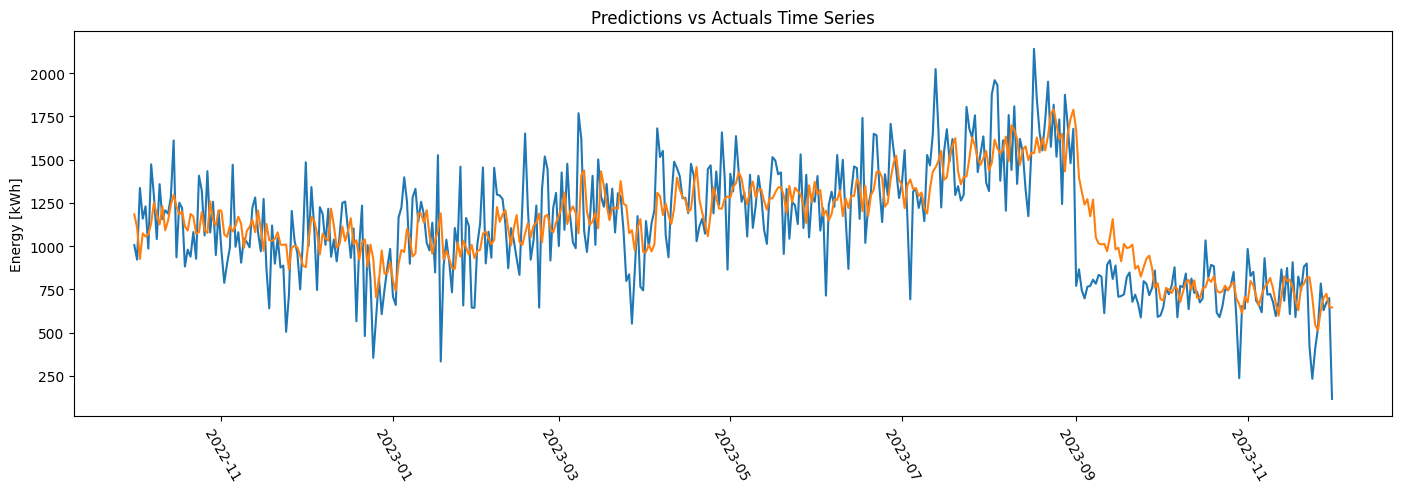

In [62]:
# Plot the original time series
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(test_predictions)
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

## Retos en el analisis de datos

### - Si decidimos aplicar una tarifa por tiempo de bloqueo cuando es superior a 4 horas,si se cobra 100 pesos por minuto, cuanto podriamos recolectar?

In [63]:
df = sc[['Total_Duration__hh_mm_ss_','Charging_Time__hh_mm_ss_']].reset_index(drop=True)
display(df)

,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_
0,2:03:02,2:02:44
1,0:24:34,0:24:19
2,9:12:21,3:40:52
3,1:54:51,1:54:29
4,0:16:58,0:16:44
...,...,...
148131,0:12:13,0:11:42
148132,0:01:07,0:00:00
148133,0:19:52,0:19:43
148134,0:28:08,0:27:50


In [64]:
display(df[6:10])

,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_
6,95:06:31,2:14:10
7,1:24:35,1:24:24
8,4:19:46,3:53:36
9,0:47:22,0:47:03


In [65]:
df['Total_Duration_timedelta'] = pd.to_timedelta(df['Total_Duration__hh_mm_ss_'])
df['Charging_Time_timedelta'] = pd.to_timedelta(df['Charging_Time__hh_mm_ss_'])
print(df['Total_Duration_timedelta'])
print(df.dtypes)
# Calcular la diferencia
df['diferencia'] = df['Total_Duration_timedelta'] - df['Charging_Time_timedelta']
# print(df.diferencia)

0        0 days 02:03:02
1        0 days 00:24:34
2        0 days 09:12:21
3        0 days 01:54:51
4        0 days 00:16:58
               ...      
148131   0 days 00:12:13
148132   0 days 00:01:07
148133   0 days 00:19:52
148134   0 days 00:28:08
148135   0 days 09:35:17
Name: Total_Duration_timedelta, Length: 148136, dtype: timedelta64[ns]
Total_Duration__hh_mm_ss_             object
Charging_Time__hh_mm_ss_              object
Total_Duration_timedelta     timedelta64[ns]
Charging_Time_timedelta      timedelta64[ns]
dtype: object


In [66]:
bloqueo_superior_4hrs = df[df['diferencia'] > timedelta(hours=4)]
print(bloqueo_superior_4hrs)
# print(mayores)
suma = bloqueo_superior_4hrs['diferencia'].sum()
print(suma)

       Total_Duration__hh_mm_ss_ Charging_Time__hh_mm_ss_  \
2                        9:12:21                  3:40:52   
6                       95:06:31                  2:14:10   
10                      11:08:17                  4:03:39   
24                      23:04:13                  1:55:47   
31                      17:11:25                  0:48:59   
...                          ...                      ...   
148103                  18:03:22                  1:02:35   
148110                  17:03:49                  7:33:09   
148116                  13:26:42                  5:32:08   
148123                 105:49:56                  3:48:17   
148135                   9:35:17                  3:50:19   

       Total_Duration_timedelta Charging_Time_timedelta      diferencia  
2               0 days 09:12:21         0 days 03:40:52 0 days 05:31:29  
6               3 days 23:06:31         0 days 02:14:10 3 days 20:52:21  
10              0 days 11:08:17         0 day

### - ¿Cuántas transacciones tienen energía cero, pero una duración de más de 10 minutos? ¿Cuántas sesiones tienen duración menos de 5 min?


In [67]:
mayor_10_energia0 = sc.copy()
mayor_10_energia0['Total_Duration_timedelta'] = pd.to_timedelta(sc['Total_Duration__hh_mm_ss_'])
prueba = mayor_10_energia0[(mayor_10_energia0['Energy__kWh_'] == 0.0) & (mayor_10_energia0['Total_Duration_timedelta']> timedelta(minutes=10))]
prueba.shape


(1848, 25)

In [68]:
menor_5_min = sc.copy()
menor_5_min['Total_Duration_timedelta'] = pd.to_timedelta(menor_5_min['Total_Duration__hh_mm_ss_'])
menor_5_min = menor_5_min[menor_5_min['Total_Duration_timedelta'] < timedelta(minutes=5)]
print(menor_5_min.shape)

(16073, 25)


### Construir el mapa de calor con ejes día de la semana y hora del día. El mapa de calor puede mostrar el número de sesiones iniciadas.


In [69]:

#Extraer el día de la semana (0: lunes, 6: domingo) y la hora del día

sc['day_of_week'] = sc['Start_Date___Time'].dt.day_name() # 0 es lunes, 6 es domingo
sc['hour_of_day'] = sc['Start_Date___Time'].dt.hour

dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sc['day_of_week'] = pd.Categorical(sc['day_of_week'], categories=dias_orden, ordered=True)

# Contar el número de sesiones por día de la semana y hora del día
heatmap_data = sc.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)



/var/folders/6v/h6bnqwh15_11vjqftnf1pxqw0000gn/T/ipykernel_22435/109689723.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = sc.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)


In [70]:
heatmap_data

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,42,18,8,6,17,302,694,965,1832,1472,...,1138,1199,1483,1446,1210,771,321,153,89,58
Tuesday,17,28,6,4,22,215,929,1211,1994,1549,...,1352,1319,1631,1792,1553,944,367,169,88,71
Wednesday,45,26,12,8,19,331,885,1110,1873,1718,...,1239,1490,1614,1902,1603,891,422,213,82,61
Thursday,41,22,14,18,30,193,795,1081,1916,1496,...,1330,1443,1524,1902,1674,922,433,214,125,53
Friday,44,25,27,8,29,332,712,1046,2040,1434,...,1433,1535,1697,2113,1622,1011,546,242,125,65
Saturday,46,54,41,20,13,76,317,852,1239,1693,...,1740,1660,1509,1655,1293,998,444,258,138,69
Sunday,45,37,19,18,14,75,290,729,1234,1315,...,1715,1627,1356,1436,867,603,267,136,71,50


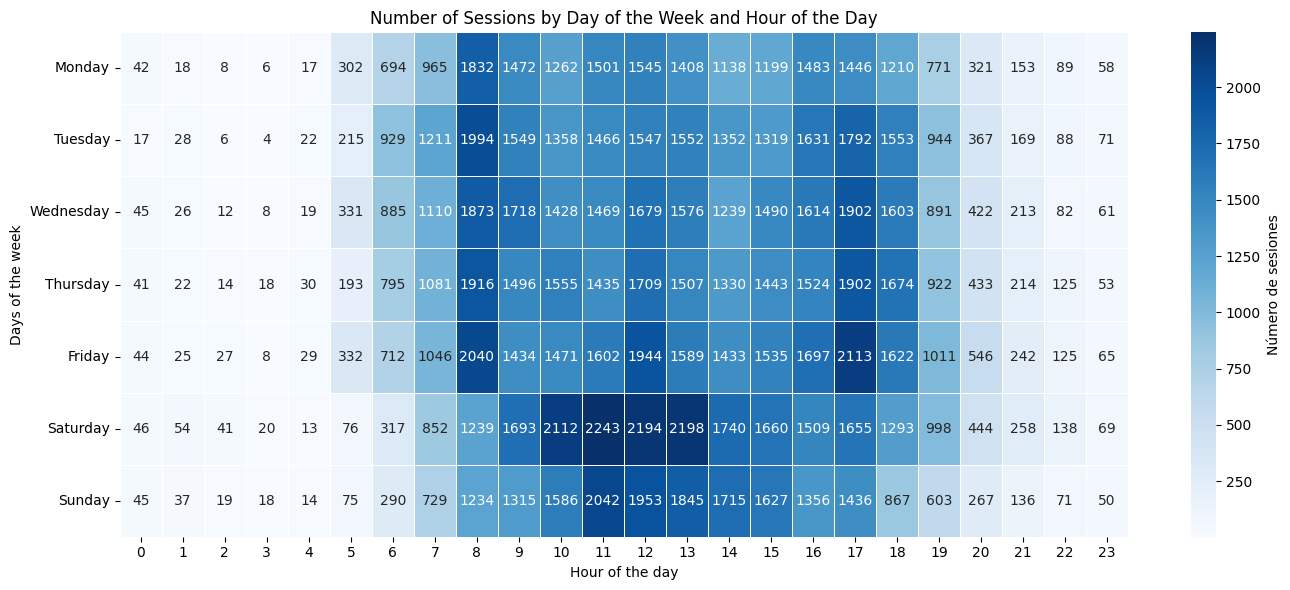

In [71]:
# Crear el heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='Blues',
    annot=True,
    fmt='d',
    linewidths=.5,
    cbar_kws={'label': 'Número de sesiones'}
)
plt.title('Number of Sessions by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the day')
plt.ylabel('Days of the week')
plt.tight_layout()
plt.show()

### ¿Total de energía por año? ¿ Total de sesiones por año?

In [72]:
anual_energy = sc.groupby(sc['Start_Date___Time'].dt.year)['Energy__kWh_'].sum()
print(anual_energy)

Start_Date___Time
2018     96262.006
2019    174278.112
2020     83136.558
2021    177291.270
2022    342259.218
2023    379492.490
Name: Energy__kWh_, dtype: float64


In [73]:
anual_charge_sessions = sc.groupby(sc['Start_Date___Time'].dt.year).size()
print(anual_charge_sessions)

Start_Date___Time
2018    13710
2019    21620
2020    10200
2021    21850
2022    37654
2023    43102
dtype: int64
